## Authorizing an application to access Twitter account data

# Importing all the Libraries require to mine Twitter

In [1]:
#import libraries that you need
import tweepy
from tweepy import OAuthHandler, Stream
import pandas as pd
import numpy as np
#using Re to remove wildcards words
import re
#Using Wordwrap 
import textwrap
#Stop words library
import nltk
from nltk.corpus import stopwords

import itertools
import collections

from textblob import TextBlob

#Importing the graphing library
import matplotlib.pyplot as plt
import seaborn as sns

#API tokens
#Enter your API Tokens

access_token = ''
access_secret = ''
consumer_key = ''
consumer_secret = ''


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
twitter_api = tweepy.API(auth)

# Series of functions to help clean the data

In [2]:
#Removing url and #hashtags
def remove_url(txt):
    return " ".join(re.sub("#(\w+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())
#Taking Hashtags words
def extract_hash(txt):
    return " ".join(re.findall(r"#(\w+)", txt))

In [2]:
# Define the search term and the date_since date as variables
search_terms = "#SSD  -filter:retweets"
date_since = "2019-01-01"
#Number of Tweets to collect
number_of_tweets=10000

In [43]:
#Setting up the curser information.
tweets = tweepy.Cursor(twitter_api.search,
              q=search_terms,
              lang="en",
              exclude_replies=False,
                tweet_mode='extended',
              since=date_since).items(10)

In [32]:
data = pd.DataFrame(data=[tweet.full_text for tweet in tweets], columns=['Tweets'])

In [45]:
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

ValueError: Length of values does not match length of index

In [33]:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

TypeError: 'ItemIterator' object is not subscriptable

In [227]:
#Setting up the curser information.
tweets = tweepy.Cursor(twitter_api.search,
              q=search_terms,
              lang="en",
              exclude_replies=False,
                tweet_mode='extended',
              since=date_since).items(number_of_tweets)


#Running the parser
parsed_tweets=[[tweet.text,
                tweet.user.screen_name,
                tweet.user.location,
                tweet.created_at,
                tweet.source,
                tweet.favorite_count,
                tweet.retweet_count
               ] for tweet in tweets]

#Putting the search result into a dataframe
data=pd.DataFrame(data=parsed_tweets,columns=["tweets", "UserName","Location","Time",'link','likes','RTs'])

AttributeError: 'Status' object has no attribute 'text'

In [266]:
for status in tweepy.Cursor(twitter_api.search, q="#SSD" "-filter:retweets", tweet_mode='extended').items(10):
    print(status.full_text)

Lo que necesitas para conectar tu #SSD y ordenador lo encontrarás aquí https://t.co/o9JZ2cO7wP #2TB #Ordenadores #Regalos #QuédateEnCasa #Tecnología #SSD https://t.co/bYhVTSGfnF
MacBook Pro Sistemim Neden Çok Yavaş. Doğru Ürünü Bilendenal.
https://t.co/7No2P6kLji
#bilendenal #macbookpro #teknoloji #ssd #bigboy #kingston #samsung #transcend https://t.co/9tVzqo1l15
My NAND flash memory is damaged. Check out eProvided's NAND flash data recover services. We service all SSD, laptops, smartphones, or drones using the NAND flash memory technology. #Photography #Holiday #SSD https://t.co/jkuEXf6LEY
My NAND flash memory is damaged. Check out eProvided's NAND flash data recover services. We service all SSD, laptops, smartphones, or drones using the NAND flash memory technology. #Photography #Holiday #SSD https://t.co/hAsTEFb5jt
New Azure #VirtualMachines with #highperformance local #SSD are now generally available 🤖 https://t.co/PQrvPe8yvI #AzureVirtualMachine
How do you recover data from failed

In [264]:
sss


['@PlayStation #PlayStation #PS5 #Xbox #XSX #SeriesX #2020 #Holiday #Future #Gaming #Games #Performance #Poll #June #Competition #Opinion #Demand #Hype #Reveal #FHD #QHD #UHD #4K #Raytracing  #Bluray #3DAudio #DualSense #NVME #SSD #Zen2 #RDNA2 #GDDR6 #AMD #Sony #Microsoft #100xFaster']

In [215]:
#Checking the parsed data
data.shape

(395, 7)

In [217]:
#Extracing Hashtags being used.
data['HashTags']=[extract_hash(tweet) for tweet in data.tweets]
#Removing HTML links and hashtags into a new column
data['cleanTweets']=[remove_url(tweet) for tweet in data.tweets]

In [225]:
data['tweets'].to_csv('testing.txt')

# What app people are using to post on Twitter

In [70]:
#I wanted to see what application is being used
info_data=data.groupby('link')['tweets'].nunique().sort_values(ascending=False).reset_index(name='count')
info_data

,link,count
0,Twitter Web App,4
1,Twitter for Android,2
2,Twitter for iPhone,1
3,Hootsuite Inc.,1


In [71]:
#I want to change the app names to other was the user rate is under 2%
info_data['percent']=info_data['count']/data.shape[0]
info_data.loc[info_data.percent <= 0.02,'link']='Other'

In [72]:
#I calcuate the group with the others included.
info_data=info_data.groupby('link').sum().sort_values(ascending=False, by ='count').reset_index()
info_data

,link,count,percent
0,Twitter Web App,4,0.500
1,Twitter for Android,2,0.250
2,Hootsuite Inc.,1,0.125
3,Twitter for iPhone,1,0.125


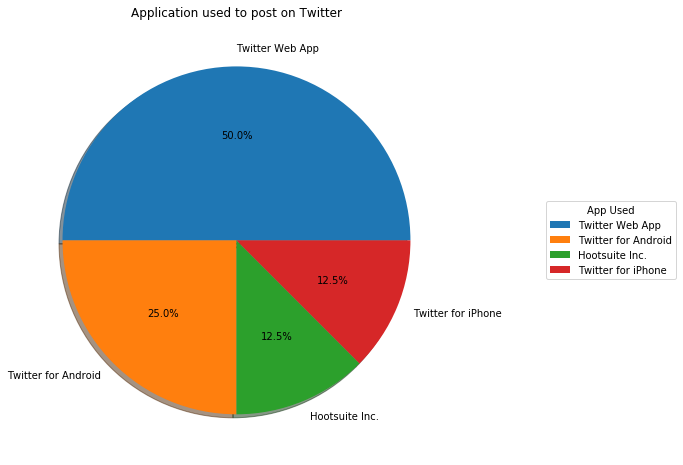

In [73]:
# Graphing the App being used into a Pie Chart
fig, ax =plt.subplots(figsize=(8,8))
ax.pie(info_data['count'],
        labels=info_data.link,
        autopct='%1.1f%%',
        shadow=True,)

ax.set_title("Application used to post on Twitter")
ax.legend(title="App Used",
          loc="center left",
          bbox_to_anchor=(1.2, 0, 0.5, 1))

plt.show()

# Now we going to look who made popular tweets beside on the Likes and Retweet numbers

In [12]:
popularUser=data[['UserName','likes','RTs']]

In [13]:
popularUser.sort_values(by='likes',ascending=False).head()

,UserName,likes,RTs
0,BIWIN_USA,0,0


In [14]:
popularUser.sort_values(by='RTs',ascending=False).head()

,UserName,likes,RTs
0,BIWIN_USA,0,0


In [15]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
favStr= "The tweet with more likes is: \n{}".format(data['tweets'][fav])
print(textwrap.fill(favStr, 50))
print("Number of likes: {}\n".format(fav_max))


# Max RTs:
favRt="The tweet with more retweets is: \n{}".format(data['tweets'][rt])
print(textwrap.fill(favRt, 50))
print("Number of retweets: {}".format(rt_max))


The tweet with more likes is:  GIVEAWAY ALERT - 8
DAYS LEFT  🔥HP P500 1TB Portable SSD 😍Stable and
Smooth Write Speed of 255MB/s  💪Max 420MB/s Seq…
https://t.co/GVCNgTHJbR
Number of likes: 0

The tweet with more retweets is:  GIVEAWAY ALERT -
8 DAYS LEFT  🔥HP P500 1TB Portable SSD 😍Stable and
Smooth Write Speed of 255MB/s  💪Max 420MB/s Seq…
https://t.co/GVCNgTHJbR
Number of retweets: 0


# Looking which hashtag is being used the most

In [74]:
#Downloading the a list of stopwords to be used later

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/bobchan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [208]:
data.head()

,tweets,UserName,Location,Time,link,likes,RTs,HashTags,cleanTweets
0,"""EX950 2TB M.2 NVMe SSD! It offers blazing fas...",BIWIN_USA,,2020-06-09 17:01:25,Hootsuite Inc.,1,0,,EX950 2TB M2 NVMe SSD It offers blazing fast s...
1,@Seagate M.2 NVMe IronWolf 510 SSD delivers ca...,pixel_llc,Tajikistan,2020-06-09 12:30:00,Twitter Web App,0,0,,Seagate M2 NVMe IronWolf 510 SSD delivers cach...
2,The Diamond✨Shinning✨ Perfect✨ Match\nG.Skill ...,addlinkchannel,Taiwan,2020-06-09 03:14:03,Twitter Web App,2,0,,The DiamondShinning Perfect MatchGSkill Royal ...
3,#HP #EX950 M.2 #2TB PCIe 3.1 x4 #NVMe 3D #TLC ...,CpgeekDeals,,2020-06-09 00:51:06,Twitter Web App,0,0,HP EX950 2TB NVMe TLC SSD deals,M2 PCIe 31 x4 3D 31 off for a limited time
4,I just introduced the @Seagate ST-4096 44MB ha...,LegitReviews,"St. Louis, Missouri",2020-06-08 19:21:31,Twitter Web App,8,1,,I just introduced the Seagate ST4096 44MB hard...


In [218]:
#Collecting all the hash tags from the dataframe
hashTagsOnly = [x for x in data.HashTags if x]

In [219]:
#Counting all the Hashtag being used
hashList = [tweet.lower().split() for tweet in hashTagsOnly]
hashLists = list(itertools.chain(*hashList))
counts_no_urls = collections.Counter(hashLists)

In [220]:
#Displaying the 15 most used Hashtag
popularHashTags = pd.DataFrame(counts_no_urls.most_common(15),columns=['words', 'count'])
popularHashTags

,words,count
0,ssd,192
1,postables,34
2,ps5,21
3,stayselcaday,14
4,hdd,10
5,nvme,8
6,hosting,7
7,amazon,7
8,storage,7
9,pc,7


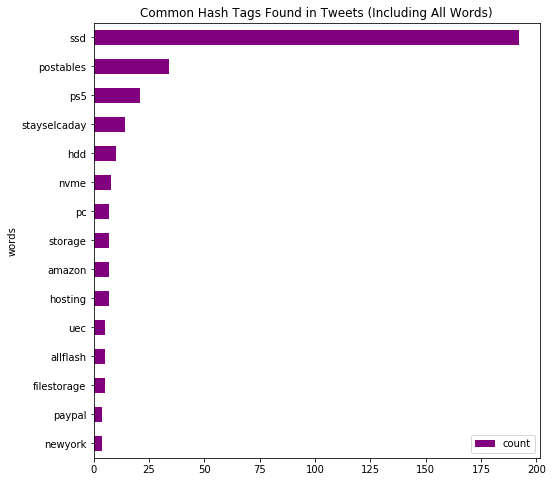

In [221]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
popularHashTags.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Hash Tags Found in Tweets (Including All Words)")

plt.show()

# There is couple of hashtag or common tag we're not interested in and would like to remove them from our listing.

In [ ]:
#Filtering Hashtags that tag that I'm not interested in and it's not related to my search
collection_words = ['cbdoil','cbd', 'cannabis', 'hempoil', 'news','hemp']

tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in hashList]

In [ ]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

In [ ]:
#Putting the Hashtags into a dataframe
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

In [ ]:
# Plot horizontal bar graph
fig, ax = plt.subplots(figsize=(8, 8))
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

# Now I want to see who's using a a popular social media posting tool called HootSuite

In [ ]:
#find all the user using Hootsuite
data_hoot=data[data['link']=='Hootsuite Inc.']

In [ ]:
#Filtering the top 5 Tweeter using Hootsuite app
data_hoot.groupby('UserName')['tweets'].nunique().sort_values(ascending=False).head()

# After seeing who using a social media tool, I want to see when they schulde their post.

In [ ]:
#I want to see what company tweets the most.
tweets = twitter_api.user_timeline(screen_name="VaporWhitehorse", count=number_of_tweets)

In [ ]:
cbd_tweets=[[tweet.text,
            tweet.created_at,
            tweet.favorite_count,
            tweet.retweet_count,
            ] for tweet in tweets]
cbd_data=pd.DataFrame(data=cbd_tweets,columns=["tweets", "Date",'likes','RTs'])

In [ ]:
cbd_data.head()

In [ ]:
#Converting the date into hours
cbd_data['Hours']=cbd_data['Date'].dt.hour

In [ ]:
#Counting the number of post through out the day by the hour.
post_hours = cbd_data.groupby('Hours').count().reset_index()
post_hours

In [ ]:
import numpy as np
x_axis = post_hours['tweets']
y_axis = post_hours['Hours']

y_time =np.arange(24)

plt.bar(y_axis, x_axis, align='center', alpha=0.5)
plt.ylabel('Number of Post')
plt.xticks(y_time, y_time)
plt.title('When Tweets happen the most in a 24 Hour day')

plt.show()

# Base on the graphic, The tweets where schulded out to be posted after work from 5pm to 10pm.


# I want to see what is the Sentiment Value of the twitter account with a high Retweet value.

In [ ]:
#I want to see what company tweets the most.
tweets = twitter_api.user_timeline(screen_name="AlphaTherapeut1",
                                   q="-filter:retweets",
                                   count=number_of_tweets)

sa_tweets=[[tweet.text,
            tweet.created_at,
            tweet.favorite_count,
            tweet.retweet_count,
            ] for tweet in tweets]

sa_data=pd.DataFrame(data=sa_tweets,columns=["tweets", "Date",'likes','RTs'])

In [ ]:
#Removing Retweets and replies
sa_data=sa_data[~sa_data.tweets.str.startswith(('RT','@'),na=False)]
sa_data.head()

In [ ]:
def analize_sentiment(tweet):
    analysis = TextBlob(remove_url(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [ ]:
# We create a column with the result of the analysis:
sa_data['SA'] = np.array([ analize_sentiment(tweet) for tweet in sa_data['tweets'] ])
sa_data['clean_tweets']=[remove_url(tweet) for tweet in sa_data.tweets]

# We display the updated dataframe with the new column:
sa_data.head()

In [ ]:
# We construct lists with classified tweets:
pos_tweets = sa_data[sa_data.SA>0].tweets
neu_tweets = sa_data[sa_data.SA==0].tweets
neg_tweets = sa_data[sa_data.SA<0].tweets

# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(sa_data['tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(sa_data['tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(sa_data['tweets'])))

# I'm doing another word count on the tweets with negative Analize sentiment

In [ ]:
#Only getting tweets that have a negative SA Score
neg_tweets=sa_data[sa_data.SA<0].clean_tweets

In [ ]:
#Counting all the tweets being used
listTweets = [tweet.lower().split() for tweet in neg_tweets]

tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in listTweets]

In [ ]:
collection_words = ['cbd','oil']

tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

cleanListTweets = list(itertools.chain(*tweets_nsw_nc))
counts_Tweets = collections.Counter(cleanListTweets)

In [ ]:
popularWords = pd.DataFrame(counts_Tweets.most_common(15),columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
popularWords.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Hash Tags Found in Tweets (Including All Words)")

plt.show()


# The tweets maded by the user had a 40% negiative scoring because the word "pain" and "chemicals" was used so often.